# TD2 : Courbes de Bezier 

## Courbes paramétriques

Au lycée on a longuement pratiqué de passionnantes études de fonctions ou en général l'on représentait en abscisse x
une variable réelle et en ordonnée une variable $y=f(x)$ dépendante de $x$.

Cette situation se généralise lorsque un point du plan (ou pourquoi pas d'un espace de plus grande dimension) voit ses coordonnées dépendre d'une variable supplémentaire appelée paramètre.
Un tel modèle nous permettra en particulier de décrire le mouvement d'un point dans le plan ou dans l'espace.

### Définitions

Une **représentation paramétrique** d’une courbe $(C)$
l'ensemble des points dont les coordonnées sont exprimées en fonction d’un paramètre (souvent noté $t, k, \theta,\ldots$).
$$
(C): t\mapsto M(t)= \begin{pmatrix}
                             x(t)\\
                             y(t) \\
                             z(t) \\
                             \vdots
                     \end{pmatrix}        
$$

où le nombre de fonctions coordonnées est la dimension de l'espace dans lequel cette courbe est « plongée ».

Le **domaine de définition** correspond aux valeurs du paramètre $t$
pour lesquelles toutes les fonctions $x$, $y$,... sont définies.

In [ ]:
from sympy import *
init_printing()

In [ ]:
t = Symbol("t")
p = plot_parametric(
                (-1+4*t,1+2*t, (t, 0, 1)) ,
                (cos(t), sin(t), (t, 0, 2*pi)) , 
                (-2+2*cos(t), 3+0.25*sin(t), (t, 0,2*pi)) , 
                (2+t**2,1+t,(t,-3,3)) , 
                xlim=(-4,6) ,
                ylim=(-4,6) ,
    show=False
               )
p[0].line_color='red'
p[1].line_color='blue'
p[2].line_color='green'
p[3].line_color='yellow'
p.show()

### Dérivées et tangeantes
Lorsque les coordonnées sont des fonctions « suffisamment » dérivables, le **vecteur vitesse** est 
$$\left( \begin{array}{c} \dot{x}(t) \\ \dot{y}(t) \\ \vdots \end{array} \right).$$
De même, le **vecteur accélération** est 
$$\left( \begin{array}{c} \ddot{x}(t) \\ \ddot{y}(t) \\ \vdots \end{array} \right).$$

Dans ces définitions, on note $\dot{x}$ la dérivée de $x$ par rapport à $t$ comme en cinématique ou en physique, pour éviter toute confusion on pourra utiliser la notation de Leibniz $\frac{dx}{dt}$.
    
On montre que, si le vecteur vitesse est non nul, alors ce vecteur est un directeur de la **tangente** à la courbe.
Quand le vecteur vitesse est nul (on parle de <em>point stationnaire</em>) mais quand le vecteur accélération
est non nul, alors ce vecteur accélération est un vecteur directeur de cette tangente.</p>

Ces propriétés sont liées à une formule de Taylor : pour $t\neq t_0$ il existe $c$ compris strictement entre $t$ et $t_0$ tel que 
$$M(t) = M(t_0) + (t-t_0)\times \dot{M}(t_0) + \frac12\,(t-t_0)^2\times\ddot{M}(c) $$

### Droites asymptotes
Les <strong>droites asymptotes</strong> peuvent être de plusieurs types :

1. **asymptote verticale** d'équation $x=a$ dans les situations où 
$$\left\{ \begin{array}{ccc} \lim x(t) &=& a \\ \lim y(t) &=& \pm\infty \end{array}\right.$$

2. **asymptote horizontale** d'équation $y=b$ dans les situations où 
$$\left\{ \begin{array}{ccc} \lim x(t) &=& \pm\infty \\ \lim y(t) &=& b \end{array}\right.$$

3. **asymptote oblique** d'équation $y=a\,x+b$ dans les situations où l'on a 
$$\left\{ \begin{array}{ccc} \lim x(t) &=& \pm\infty \\ \lim y(t) &=& \pm\infty \\ \lim \frac{y(t)}{x(t)} &=& a \\ \lim y(t) - a \times x(t) &=& b \end{array}\right..$$

## Exercice 1
Étudier
$$t \mapsto \left(
\begin{array}{c} t^2 \\ t^3-3t \end{array}
\right)$$

1. Montrer qu'il y a un seul point double : y tracer les tangentes.
2. Tangente horizontale, verticale, etc. ?


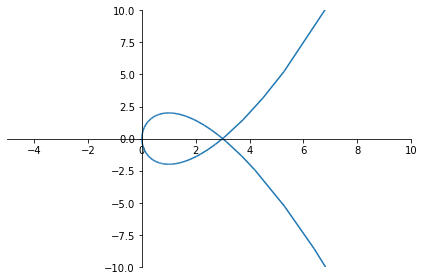

In [4]:
pp=plot_parametric(  t**2 , t**3-3*t , (t,-10,10) , xlim=(-5,10.0) , ylim=(-10.0,10.0), show=False )
pp.show()

## Exercice 2
Etudier la courbe paramétrée définie par
$$t \mapsto \left( \begin{array}{c} \frac1t\\ (t^3+2)/t \end{array} \right) $$


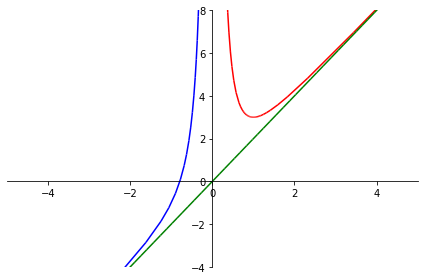

In [6]:
p=plot_parametric(   (1/t , (t**3+2)/t , (t,0,10)),
                     (1/t , (t**3+2)/t , (t,-10,0)),
                     (t, 2*t, (t,-5,5)),
                     xlim=(-5,5.0) , ylim=(-4,8), show=False )
p[0].line_color='red'
p[1].line_color='blue'
p[2].line_color='green'
p.show()

## Algorithme de de Casteljau


In [7]:
import numpy as np

In [8]:
def BezierCurve(points, t):
    dim, n = points.shape
    if(n==1):
        return points
    else:
        newpoints=np.zeros((2, n-1))
        for i in range(n-1):
            newpoints[:,i] = (1-t) * points[:,i] + t * points[:,i+1]
        return BezierCurve(newpoints, t)

In [9]:
points = np.array([[4, 0, 0, 4], [4, -10, 14, 0]])
BezierCurve(points, 0.5)

array([[1.],
       [2.]])

In [10]:
from matplotlib import pyplot as plt

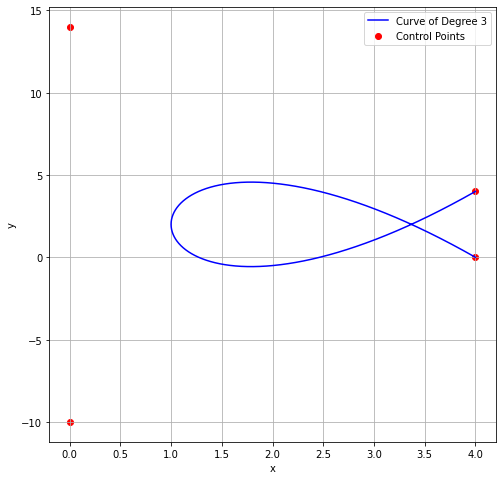

In [11]:
dim, n = points.shape
to_plot_x = []  # x coordinates of points to plot
to_plot_y = []  # y coordinates of points to plot
step_size = 0.01

t = np.arange(0,1.01, 0.01)
for s in t:
    value = BezierCurve(points, s)
    to_plot_x.append(value[0])
    to_plot_y.append(value[1])

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(
    to_plot_x,
    to_plot_y,
    color="blue",
    label="Curve of Degree " + str(n-1),
)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(points[0,:],points[1,:], color="red", label="Control Points")
ax.legend()
ax.grid()
plt.show()

In [12]:
import sympy as sp
t = sp.Symbol("t")

In [29]:
def BezierCurve2(x, y, t):
    n = len(x)
    if(n==1):
        return (expand(x[0]),expand(y[0]), (t,0,1))
    else:
        newx=[]
        newy=[]
        for i in range(n-1):
            newx.append( (1-t) * x[i] + t * x[i+1])
            newy.append( (1-t) * y[i] + t * y[i+1])
        return BezierCurve2(newx, newy, t)

In [30]:
# test
x=[4,  0, 0,4]
y=[4,-10,14,0]
curve = BezierCurve2(x, y, t)
curve

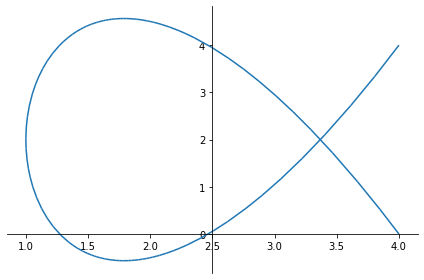

In [31]:
p=plot_parametric(curve)